In [1]:
import os
import numpy as np
import librosa
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Dataset paths
screaming_dir = r"C:\Users\Pc\Documents\Ml_Project\Screaming"
not_screaming_dir = r"C:\Users\Pc\Documents\Ml_Project\NotScreaming"

In [ ]:
# Load audio function
def load_audio(file_path, sr=16000, duration=5.0):
    # Define a function that loads an audio file with a specified sampling rate and duration

    try:
        # Try block to handle exceptions during audio loading

        y, sr = librosa.load(file_path, sr=sr, duration=duration, mono=True)
        # Load the audio file using librosa
        # y: audio time series, sr: sampling rate
        # sr=16000 means the audio will be resampled to 16 kHz
        # duration=2.0 means load only up to the first 2 seconds
        # mono=True ensures the audio is converted to mono channel

        target_length = int(sr * duration)
        # Calculate the total number of samples for the desired duration

        if len(y) < target_length:
            # If the loaded audio is shorter than expected

            y = np.pad(y, (0, target_length - len(y)), mode='constant')
            # Pad the audio with zeros at the end to match the desired length

        return y[:target_length]
        # Return the audio array trimmed or padded to exactly the target length

    except Exception as e:
        # Catch any error that occurs during the process

        print(f"Failed to load {file_path}: {e}")
        # Print an error message with file path and exception details

        return None
        # Return None to indicate that the audio loading failed


In [ ]:
# Load dataset
def load_dataset(scream_dir, nonscream_dir):
    # Define a function that loads audio data from two directories: scream and non-scream

    X, y = [], []
    # Initialize empty lists: X for audio data, y for labels

    for file in os.listdir(scream_dir):
        # Loop through each file in the scream directory

        file_path = os.path.join(scream_dir, file)
        # Construct the full path to the current file

        audio = load_audio(file_path)
        # Load the audio file using the previously defined load_audio function

        if audio is not None:
            # Check if the audio was successfully loaded

            X.append(audio)
            # Append the audio data to the features list X

            y.append(1)
            # Append label 1 for scream

        else:
            print(f"Skipped scream file: {file}")
            # Print a message if the scream file could not be loaded

    for file in os.listdir(nonscream_dir):
        # Loop through each file in the non-scream directory

        file_path = os.path.join(nonscream_dir, file)
        # Construct the full path to the current file

        audio = load_audio(file_path)
        # Load the audio file

        if audio is not None:
            # Check if the audio was successfully loaded

            X.append(audio)
            # Append the audio data to the features list X

            y.append(0)
            # Append label 0 for non-scream

        else:
            print(f"Skipped non-scream file: {file}")
            # Print a message if the non-scream file could not be loaded

    return np.array(X), np.array(y)
    # Convert lists to NumPy arrays and return them as the dataset (features and labels)


In [34]:
# Load data
print("Loading dataset...")
X, y = load_dataset(screaming_dir, not_screaming_dir)
print(f"Loaded {len(X)} samples")

Loading dataset...
Failed to load C:\Users\Pc\Documents\Ml_Project\Screaming\desktop.ini: 
Skipped scream file: desktop.ini


C:\Users\Pc\AppData\Local\Temp\ipykernel_3580\4029724831.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=sr, duration=duration, mono=True)


Failed to load C:\Users\Pc\Documents\Ml_Project\Screaming\scream2.ipynb: 
Skipped scream file: scream2.ipynb
Failed to load C:\Users\Pc\Documents\Ml_Project\NotScreaming\desktop.ini: 
Skipped non-scream file: desktop.ini
Loaded 8724 samples


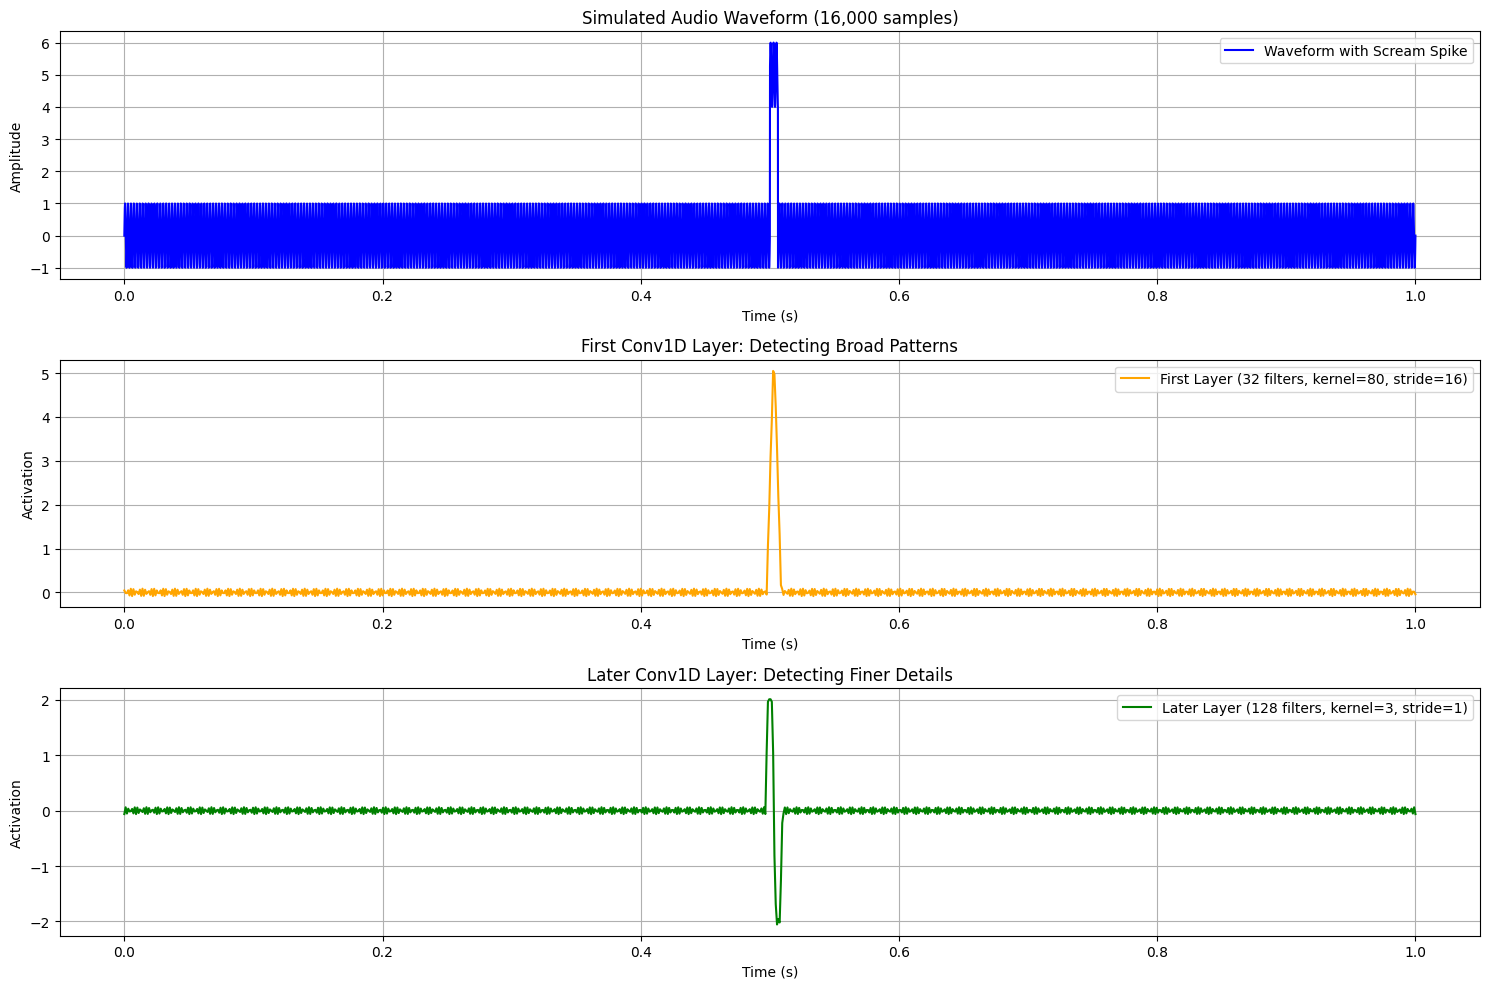

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve
# Import the convolve function for 1D convolution from SciPy

# Simulate a 1-second audio waveform (16,000 samples at 16kHz, scaled down for plotting)
sample_rate = 16000
# Define the audio sampling rate (16,000 samples per second)

duration = 1.0  # 1 second for simplicity (16,000 samples)
# Total duration of the simulated audio in seconds

t = np.linspace(0, duration, int(sample_rate * duration))
# Generate time values from 0 to 1 second, evenly spaced (16,000 points)

waveform = np.sin(2 * np.pi * 440 * t)  # Base 440Hz tone
# Create a sine wave representing a pure 440Hz tone (A4 pitch)

# Add a "scream-like" spike at 0.5s
spike_position = int(0.5 * sample_rate)
# Determine the sample index corresponding to 0.5 seconds

waveform[spike_position:spike_position + 100] += 5.0  # Sharp spike
# Add a sharp amplitude spike (like a scream) at 0.5s to simulate an anomaly

# Simulate Conv1D for the first layer (32 filters, kernel_size=80, strides=16)
kernel_size_1 = 80
# Size of the convolution filter (like how many time steps it spans)

stride_1 = 16
# Stride controls the step size the filter moves each time (downsampling effect)

# Create a simple kernel (e.g., a box filter to detect broad patterns)
kernel_1 = np.ones(kernel_size_1) / kernel_size_1  # Averaging filter
# A basic filter that averages values within the kernel window (smoothing effect)

# Convolve (mode='valid' to avoid edge effects for simplicity)
output_1 = convolve(waveform, kernel_1, mode='valid')
# Apply convolution to the waveform using the kernel (no padding)

# Apply stride by downsampling
output_1 = output_1[::stride_1]
# Downsample the result by taking every `stride_1`th value (simulates stride in Conv1D)

# Time axis for the output
t_output_1 = np.linspace(0, duration, len(output_1))
# Create a new time axis that matches the length of the downsampled output

# Simulate Conv1D for a later layer (128 filters, kernel_size=3, on the first layer's output)
kernel_size_3 = 3
# Kernel size for a later convolutional layer (smaller to detect finer features)

stride_3 = 1  # Smaller stride for finer details
# Stride of 1 keeps every convolved value, preserving detail

kernel_3 = np.array([1, 0, -1])  # Edge-detection-like filter for finer details
# A simple edge detection kernel to highlight sharp transitions in data

output_3 = convolve(output_1, kernel_3, mode='valid')
# Convolve the output of the first layer with the new kernel

output_3 = output_3[::stride_3]
# Apply the stride (in this case, stride of 1 keeps all values)

t_output_3 = np.linspace(0, duration, len(output_3))
# Generate a time axis for the final output


# Plotting
plt.figure(figsize=(15, 10))

# Plot 1: Original Waveform
plt.subplot(3, 1, 1)
plt.plot(t, waveform, label='Waveform with Scream Spike', color='blue')
plt.title('Simulated Audio Waveform (16,000 samples)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Plot 2: First Layer Output (Broad Patterns)
plt.subplot(3, 1, 2)
plt.plot(t_output_1, output_1, label='First Layer (32 filters, kernel=80, stride=16)', color='orange')
plt.title('First Conv1D Layer: Detecting Broad Patterns')
plt.xlabel('Time (s)')
plt.ylabel('Activation')
plt.grid(True)
plt.legend()

# Plot 3: Later Layer Output (Finer Details)
plt.subplot(3, 1, 3)
plt.plot(t_output_3, output_3, label='Later Layer (128 filters, kernel=3, stride=1)', color='green')
plt.title('Later Conv1D Layer: Detecting Finer Details')
plt.xlabel('Time (s)')
plt.ylabel('Activation')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

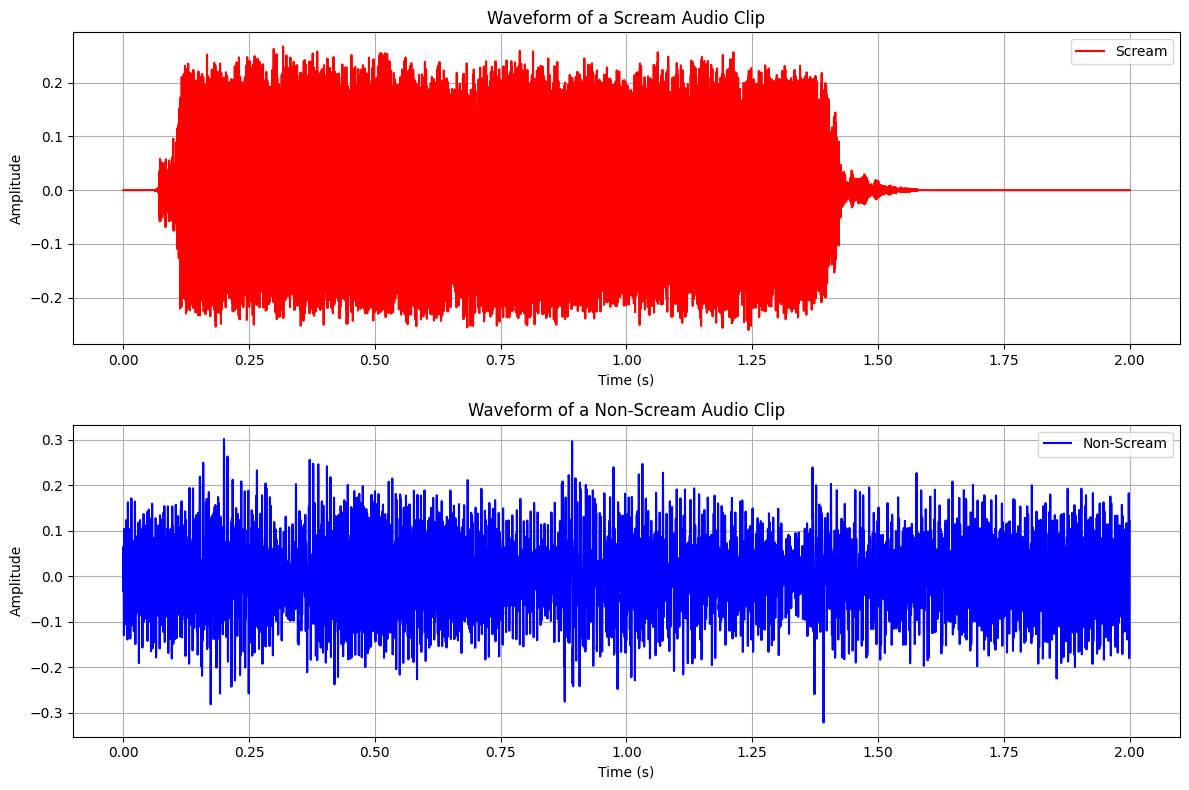

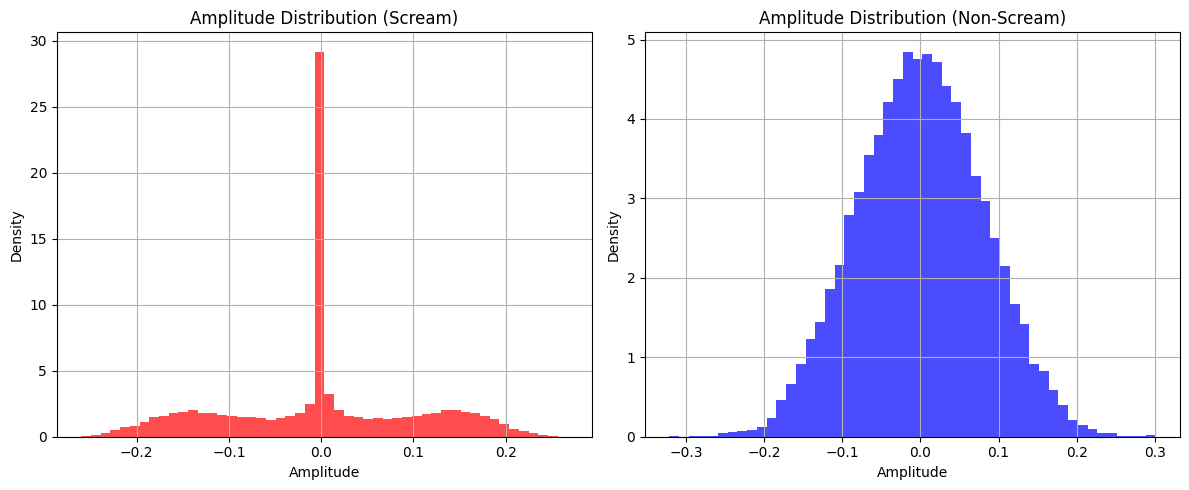

In [42]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt

# Dataset paths
screaming_dir = r"C:\Users\Pc\Documents\Ml_Project\Screaming"
not_screaming_dir = r"C:\Users\Pc\Documents\Ml_Project\NotScreaming"

# Load audio function (same as before)
def load_audio(file_path, sr=16000, duration=2.0):
    try:
        y, sr = librosa.load(file_path, sr=sr, duration=duration, mono=True)
        target_length = int(sr * duration)
        if len(y) < target_length:
            y = np.pad(y, (0, target_length - len(y)), mode='constant')
        return y[:target_length]
    except Exception as e:
        print(f"Failed to load {file_path}: {e}")
        return None

# Load one scream and one non-scream clip
scream_files = os.listdir(screaming_dir)
not_scream_files = os.listdir(not_screaming_dir)

# Pick the first file from each directory (or choose a specific one)
scream_file = os.path.join(screaming_dir, scream_files[5])
not_scream_file = os.path.join(not_screaming_dir, not_scream_files[8])

scream_audio = load_audio(scream_file)
not_scream_audio = load_audio(not_scream_file)

# Check if both files loaded successfully
if scream_audio is None or not_scream_audio is None:
    print("Failed to load one or both audio files. Please check the files.")
    exit()

# Time axis for plotting
sr = 16000
duration = 2.0
t = np.linspace(0, duration, int(sr * duration))

# Plot 1: Waveforms
plt.figure(figsize=(12, 8))

# Scream waveform
plt.subplot(2, 1, 1)
plt.plot(t, scream_audio, label='Scream', color='red')
plt.title('Waveform of a Scream Audio Clip')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Non-scream waveform
plt.subplot(2, 1, 2)
plt.plot(t, not_scream_audio, label='Non-Scream', color='blue')
plt.title('Waveform of a Non-Scream Audio Clip')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Plot 2: Amplitude Distribution (Histogram)
plt.figure(figsize=(12, 5))

# Scream amplitude distribution
plt.subplot(1, 2, 1)
plt.hist(scream_audio, bins=50, color='red', alpha=0.7, density=True)
plt.title('Amplitude Distribution (Scream)')
plt.xlabel('Amplitude')
plt.ylabel('Density')
plt.grid(True)

# Non-scream amplitude distribution
plt.subplot(1, 2, 2)
plt.hist(not_scream_audio, bins=50, color='blue', alpha=0.7, density=True)
plt.title('Amplitude Distribution (Non-Scream)')
plt.xlabel('Amplitude')
plt.ylabel('Density')
plt.grid(True)

plt.tight_layout()
plt.show()

In [35]:
# Prepare data for 1D CNN (add channel dimension)
X = X[..., np.newaxis]  # Shape: (2000, 32000, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (6979, 32000, 1), Test shape: (1745, 32000, 1)


In [36]:
# Build 1D CNN model
def build_1d_cnn(input_shape=(32000, 1)):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv1D(32, kernel_size=80, strides=16, activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling1D(pool_size=4),
        tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu'),
        tf.keras.layers.MaxPooling1D(pool_size=4),
        tf.keras.layers.Conv1D(128, kernel_size=3, activation='relu'),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

# Create and compile model
model = build_1d_cnn()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)               │ (None, 1996, 32)       │         2,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 499, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 497, 64)        │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 124, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 122, 128)       │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_2      │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,825 (163.38 KB)

 Trainable params: 41,825 (163.38 KB)

 Non-trainable params: 0 (0.00 B)

# CNN MODEL STRUCTURE

* Build 1D CNN model

Defines a function to create a 1D CNN using Keras.

Input shape is (32000, 1) — representing 2 seconds of mono audio at 16kHz.

> Model Architecture

* Sequential model — layers are added one after another.

    * 1st Conv1D Layer

        32 filters of size 80.

        Stride of 16 to reduce the temporal dimension.

        ReLU activation function.

* 1st MaxPooling1D Layer

    Pool size of 4 for downsampling.

* 2nd Conv1D Layer

    64 filters with a kernel size of 3.

    ReLU activation function.

* 2nd MaxPooling1D Layer

    Pool size of 4 for further downsampling.

* 3rd Conv1D Layer

    128 filters with kernel size of 3.

    Extracts deeper audio features.

    GlobalAveragePooling1D

    Reduces each feature map to a single average value.

* 1st Dropout Layer

    Dropout rate of 0.5 to prevent overfitting.

* Dense Layer

    Fully connected with 64 neurons and ReLU activation.

* 2nd Dropout Layer

    Another 0.5 dropout for regularization.

* Output Layer

    Single neuron with sigmoid activation for binary classification (scream vs. non-scream).

* Model Compilation

    Uses Adam optimizer.

    Loss function: binary_crossentropy (suitable for binary classification).

Evaluation metric: accuracy.

Model Summary

Prints a summary of the model's layers, output shapes, and parameters.

In [37]:
# Train model
print("Training model...")
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Training model...
Epoch 1/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.7207 - loss: 0.5353 - val_accuracy: 0.9341 - val_loss: 0.2143
Epoch 2/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9412 - loss: 0.2123 - val_accuracy: 0.9606 - val_loss: 0.1585
Epoch 3/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9485 - loss: 0.1666 - val_accuracy: 0.9635 - val_loss: 0.1420
Epoch 4/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9533 - loss: 0.1506 - val_accuracy: 0.9613 - val_loss: 0.1358
Epoch 5/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9580 - loss: 0.1401 - val_accuracy: 0.9670 - val_loss: 0.1324
Epoch 6/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9622 - loss: 0.1343 - val_accuracy: 0.9628 - val_loss: 0.1292
Epoch 7/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9637 - loss: 0.1119 - val_accuracy: 0.9542 - val_loss: 0.1551
Epoch 8/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9633 - loss:

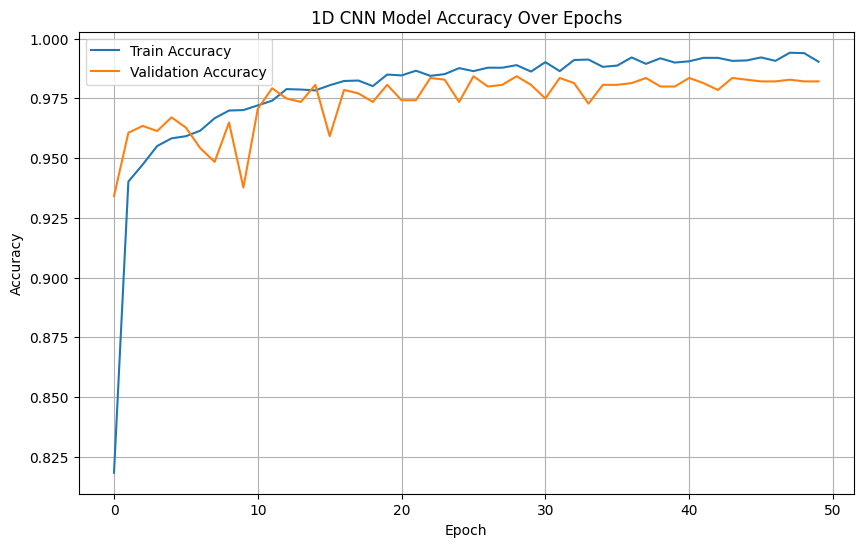

In [38]:
# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('1D CNN Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

Test Loss: 0.0970, Test Accuracy: 0.9874


In [40]:
# Save model
model.save(r"C:\Users\Pc\Documents\Ml_Project\scream_1d_cnn_model.h5")
print("Model saved to scream_1d_cnn_model.h5")

Model saved to scream_1d_cnn_model.h5


In [48]:
# Test inference on a single file
test_file = r"C:\Users\Pc\Documents\Ml_Project\Screaming\01-baby-crying-hard-and-long-76958.mp3"
test_audio = load_audio(test_file)
if test_audio is not None:
    test_audio = test_audio[np.newaxis, ..., np.newaxis]  # Shape: (1, 32000, 1)
    pred = model.predict(test_audio, verbose=0)
    print(f"Prediction for {test_file}: {'Scream' if pred[0] > 0.5 else 'Not a scream'} (confidence: {pred[0][0]:.4f})")

Prediction for C:\Users\Pc\Documents\Ml_Project\Screaming\01-baby-crying-hard-and-long-76958.mp3: Scream (confidence: 0.9922)
